In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from IPython.core.display import display, HTML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

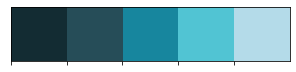

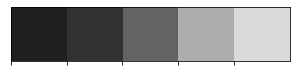

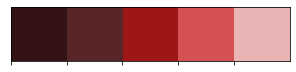

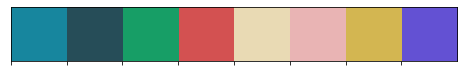

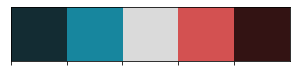

In [2]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [3]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpl.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

th = [0, 0.2, 0.5, 0.8, 1]
cdict = NonLinCdict(th, colors_blue)
cdiv = NonLinCdict(th, colors_div)

cm = LinearSegmentedColormap('blue', cdict)
cm_div = LinearSegmentedColormap('div', cdiv)

In [4]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = colors_dark[0]

# Introduction

Since WHO declares COVID-19 as a global pandemic, people were forced to do their normal activities life on home, Activity such as schools, works, etc. Those activity which normally were done offline is now online. With the rise of people work and go to school online, there has to be an effect on the usage of online services. In this notebook I will try to explore and explain the effects of COVID-19 pandemic on online service usages specifically on online education services.

# Data Description

We include three basic sets of files to help you get started. The engagement data are based on LearnPlatform’s Student Chrome Extension. The extension collects page load events of over 10K education technology products in our product library, including websites, apps, web apps, software programs, extensions, ebooks, hardwares, and services used in educational institutions. The engagement data have been aggregated at school district level, and each file represents data from one school district. The product file includes information about the characteristics of the top 372 products with most users in 2020. The district file includes information about the characteristics of school districts, including data from National Center for Education Statistics (NCES), The Federal Communications Commission (FCC), and Edunomics Lab.

# General Statistics

Before we dive deep into the data, it is best to know the data in general first, like how many missing values are in the data, and some basic statistics

## Data Product

In [5]:
data_product = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
data_district = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
data_product

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


In the product data, we can see that the data consist of 372 rows of data with 6 columns. 

Each columns and its defitionion are listed below: 
* **LP ID**: 

    The unique identifier of the product
* **URL**: 

    Web Link to the specific product
* **Product Name**: 

    Name of the specific product
* **Provider/Company Name**: 

    Name of the product provider
* **Sector(s):** 

    Sector of education where the product is used
* **Primary Essential Function**: 
    
    The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled

## Data District

In [6]:
data_district

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In the product data, we can see that the data consist of 233 rows of data with 7 columns. 

Each columns and its defitionion are listed below: 
* **district_id**: 

    The unique identifier of the school district
* **state**: 

    NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. See Locale Boundaries User's Manual for more information.
* **pct_black/hispanic**: 

    Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
* **pct_free/reduced**: 

    Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
* **countyconnectionsratio** 

    ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
* **pptotalraw**: 
    
    Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

## Missing Data

To provide the reader the context of the data, author provided a visualization that shows the percentage of the missing datas. But since this notebook does not consist of any machine learning modelling, author decided to not process those missing values. 

### Product Data 
We can see from the visualization below that the percentage of missing data on Product data is about +/- 5% on two columns, that is column Sector(s) and column Primary Essentials Function. As stated above, author does not process the missing values.  

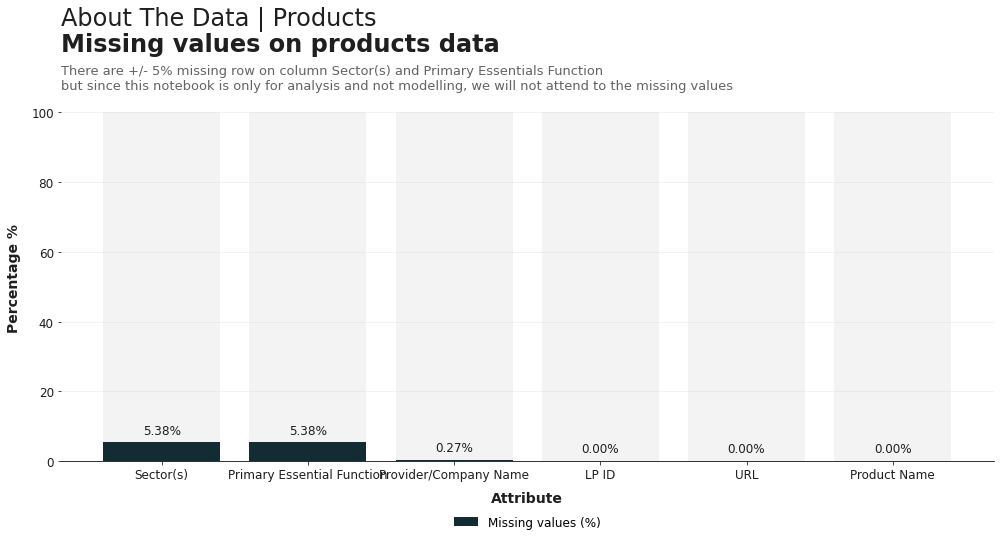

In [7]:
train_null = (data_product.isnull().sum() / len(data_product) * 100).sort_values(ascending=False)
train_notnull = (data_product.notnull().sum() / len(data_product) * 100).sort_values()

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x=train_null.index, height=train_null.values, color=colors_blue[0])
bars2 = ax.bar(x=train_notnull.index, height=train_notnull.values, bottom=train_null.values, alpha=0.3, color=colors_dark[-1])

for bar in bars1: 
    height = bar.get_height()
    x = bar.get_x()
    
    ax.text(
        x=x+0.4, y=height + 2.5,
        ha='center',
        s="{:.2f}%".format(height),
        fontsize=12,
        color=colors_dark[0],
    )

ax.legend(["Missing values (%)"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("Attribute", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Percentage %", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])


xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="About The Data | Products", ha='left', x=xmin, y=ymax*1.19, fontsize=24, color=colors_dark[0])
plt.text(s="Missing values on products data", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("There are +/- 5% missing row on column Sector(s) and Primary Essentials Function\nbut since this notebook is only for analysis and not modelling, we will not attend to the missing values", loc='left', fontsize=13, color=colors_dark[2]) 
plt.tight_layout()
plt.show()

### Product Data 
We can see from the visualization below that all columns besides district_id have a missing data, with a variety of percentage. As stated above, author does not process the missing values.  

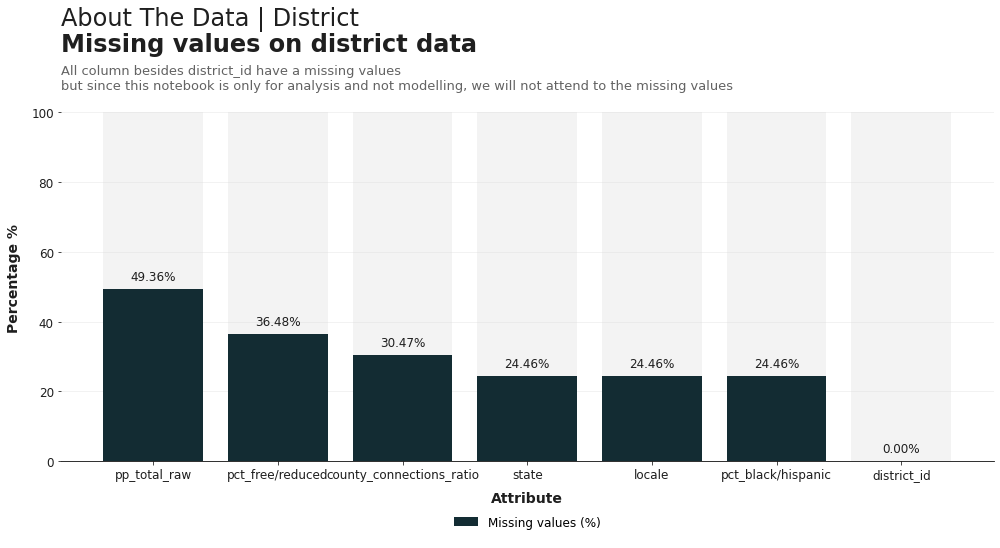

In [8]:
train_null = (data_district.isnull().sum() / len(data_district) * 100).sort_values(ascending=False)
train_notnull = (data_district.notnull().sum() / len(data_district) * 100).sort_values()

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x=train_null.index, height=train_null.values, color=colors_blue[0])
bars2 = ax.bar(x=train_notnull.index, height=train_notnull.values, bottom=train_null.values, alpha=0.3, color=colors_dark[-1])

for bar in bars1: 
    height = bar.get_height()
    x = bar.get_x()
    
    ax.text(
        x=x+0.4, y=height + 2.5,
        ha='center',
        s="{:.2f}%".format(height),
        fontsize=12,
        color=colors_dark[0],
    )

ax.legend(["Missing values (%)"], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.2)
ax.set_axisbelow(True)
ax.tick_params(labelsize=12)
ax.set_xlabel("Attribute", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Percentage %", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])


xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="About The Data | District", ha='left', x=xmin, y=ymax*1.19, fontsize=24, color=colors_dark[0])
plt.text(s="Missing values on district data", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("All column besides district_id have a missing values\nbut since this notebook is only for analysis and not modelling, we will not attend to the missing values", loc='left', fontsize=13, color=colors_dark[2]) 
plt.tight_layout()
plt.show()

## Count of Products By Its Functions

From the visualization below, we can see that the dataset consist of many type of products specifically product by its functions. Most of the product that is in this datasets belongs to Digital Learning Platforms, well almost all the product in the top spots belongs to digital learning services. 

Since the documentation said that the product data is collected from top 372 products with most users in 2020, by that alone we can conclude that online learning services is plentiful

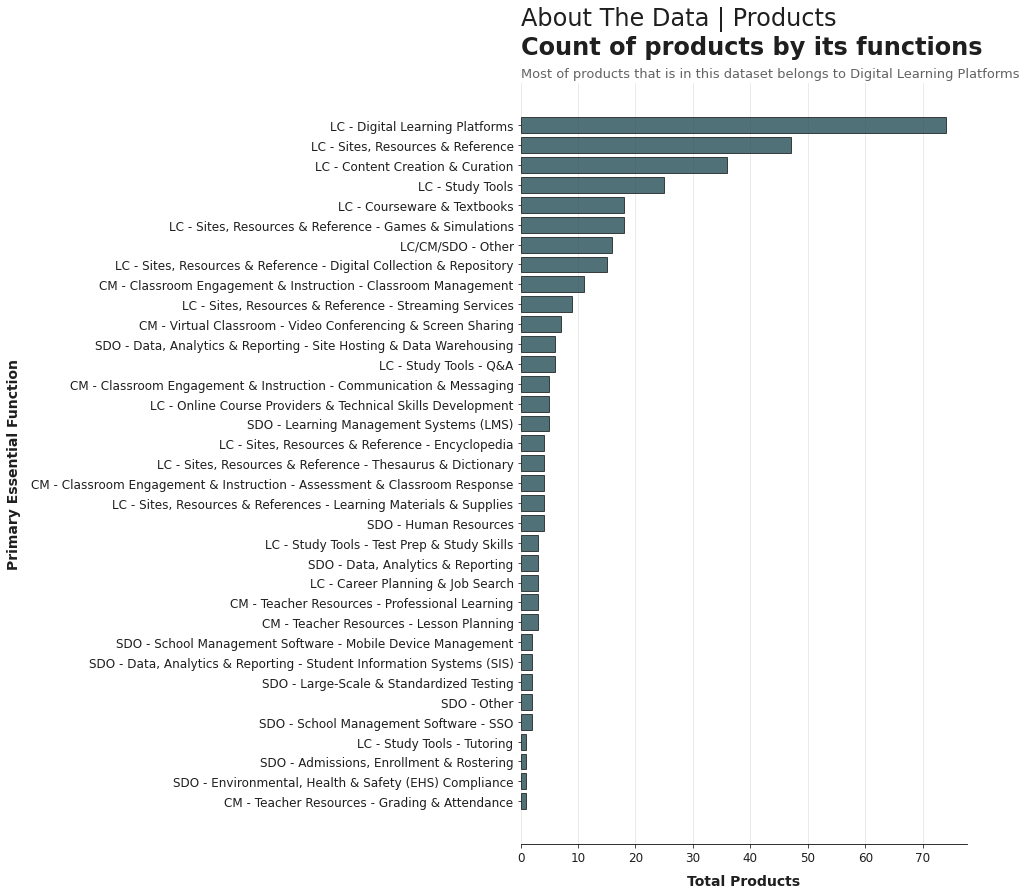

In [9]:
df = data_product.groupby('Primary Essential Function').count()[['LP ID']].sort_values(by="LP ID", ascending=True)

fig, ax = plt.subplots(figsize=(8, 14))

bars0 = ax.barh(df.index, df['LP ID'], color=colors_blue[1], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Primary Essential Function", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="About The Data | Products", ha='left', x=xmin, y=ymax*1.08, fontsize=24, color=colors_dark[0])
plt.text(s="Count of products by its functions", ha='left', x=xmin, y=ymax*1.04, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Most of products that is in this dataset belongs to Digital Learning Platforms", loc='left', fontsize=13, color=colors_dark[2]) 

plt.show()

## Count of Products By Its Sector(s)

From the visualization below we can see that most of the products that is listed on this dataset is used for PreK-12 (meant for 1st grade to 12th grade students) with the number of 170 products. 

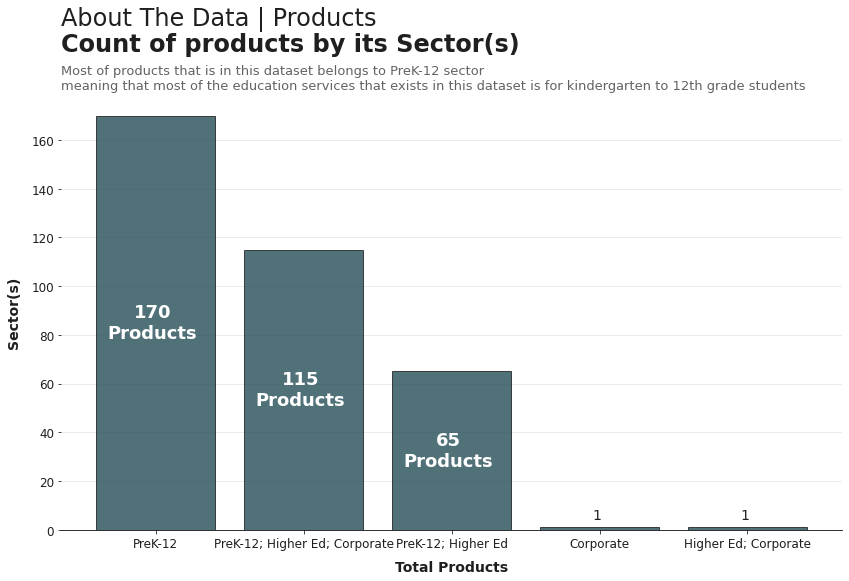

In [10]:
df = data_product.groupby('Sector(s)').count()[['LP ID']].sort_values(by="LP ID", ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(df.index, df['LP ID'], color=colors_blue[1], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Sector(s)", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


for i, bar in enumerate(bars0) : 
    x=bar.get_x()
    y=bar.get_height()
    if i < 3 : 
        ax.text(
        s=f"{df.iloc[i].values[0]}\nProducts",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=18,
        fontweight='bold')
    else : 
        ax.text(
        s=f"{df.iloc[i].values[0]}",
        va='center', ha='center', 
        x=x+0.38, y=y+5,
        color=colors_dark[0],
        fontsize=14)
        

plt.text(s="About The Data | Products", ha='left', x=xmin, y=ymax*1.16, fontsize=24, color=colors_dark[0])
plt.text(s="Count of products by its Sector(s)", ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Most of products that is in this dataset belongs to PreK-12 sector\nmeaning that most of the education services that exists in this dataset is for kindergarten to 12th grade students", loc='left', fontsize=13, color=colors_dark[2]) 

plt.show()


## Which Company Most Listed In this Dataset?

From the visualization below it is clear that Google LLC dominates with 30 products. Other than google, there are no product that have 10 products in this datasets.

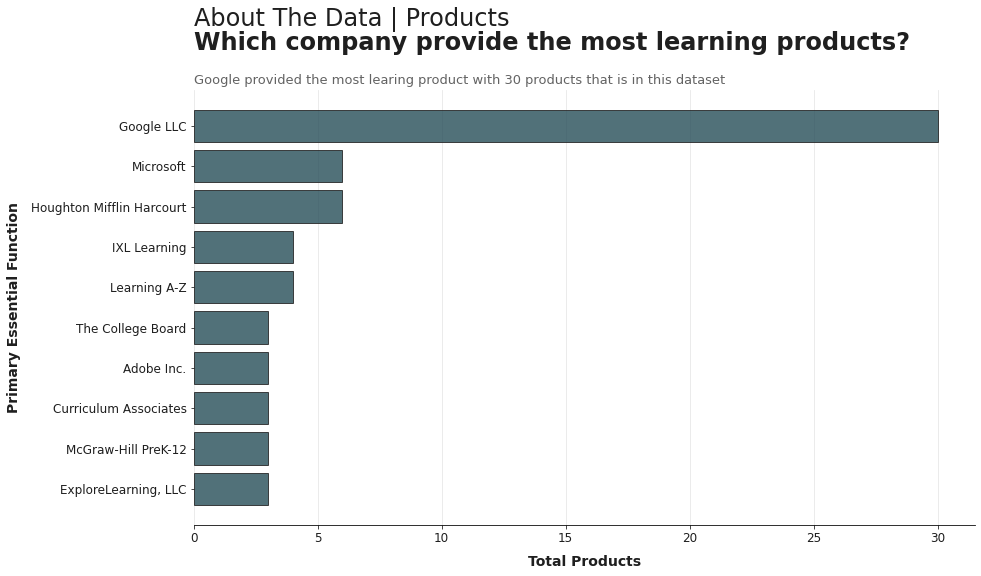

In [11]:
df = data_product.groupby('Provider/Company Name').count()[['LP ID']].sort_values(by="LP ID", ascending=True)[-10:]

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.barh(df.index, df['LP ID'], color=colors_blue[1], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Primary Essential Function", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


   
        
plt.text(s="About The Data | Products", ha='left', x=xmin, y=ymax*1.16, fontsize=24, color=colors_dark[0])
plt.text(s="Which company provide the most learning products?", ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Google provided the most learing product with 30 products that is in this dataset", loc='left', fontsize=13, color=colors_dark[2]) 

plt.show()

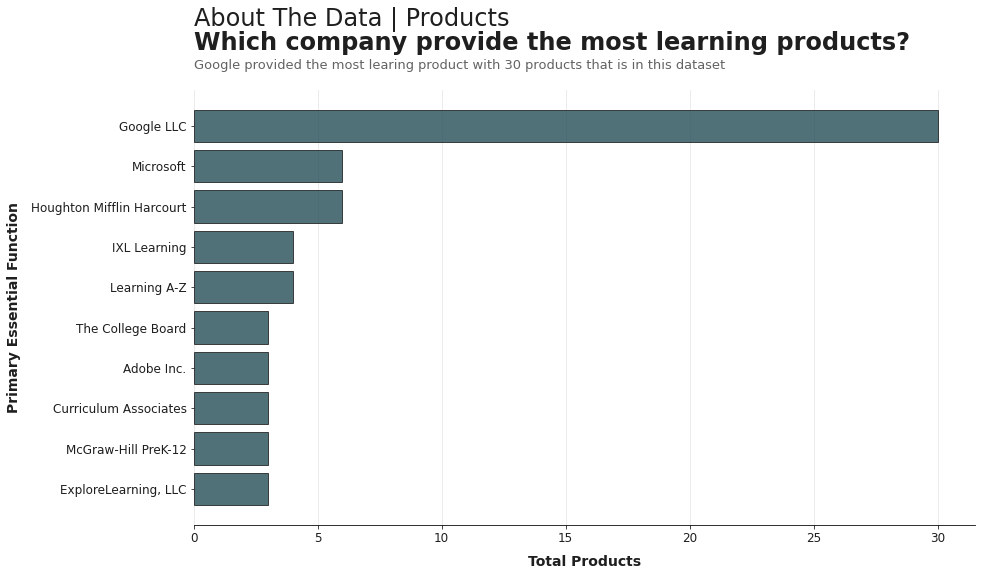

In [12]:
df = data_product.groupby('Provider/Company Name').count()[['LP ID']].sort_values(by="LP ID", ascending=True)[-10:]

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.barh(df.index, df['LP ID'], color=colors_blue[1], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Primary Essential Function", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


   
        
plt.text(s="About The Data | Products", ha='left', x=xmin, y=ymax*1.16, fontsize=24, color=colors_dark[0])
plt.text(s="Which company provide the most learning products?", ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Google provided the most learing product with 30 products that is in this dataset\n", loc='left', fontsize=13, color=colors_dark[2]) 

plt.show()

In [13]:
PATH = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 

temp = []

for district in data_district.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    temp.append(df)
    
    
engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)

engagement.engagement_index=engagement.engagement_index.fillna(0)
data_product=data_product.rename(columns = {'LP ID': 'lp_id'}, inplace = False)

df1=engagement.join(data_district.set_index('district_id'),on='district_id')
df2=df1.join(data_product.set_index('lp_id'),on='lp_id')
df_joined=df2.dropna(subset=['Product Name'])

In [14]:
df_joined['time'] = pd.to_datetime(df_joined['time'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# In-Depth Analysis

Before author explore and explain in depth analysis, there are a few keywords that needs to be known, that is **engagement_index** and **pct_access**. Both of those variables will be heavily used in the next exploration. Below are the list and the definition of those variables
* **engagement_index**:
    Total page-load events per one thousand students of a given product and on a given day
* **pct_access**: Percentage of students in the district have at least one page-load event of a given product and on a given day

Both of the variables above can be used to determined the popularity of a certain products, thus an important variables



## Which Services Is Most Used?

To find out which services is the most used, we can use the engagement_index variables. But since we are given the data for each states in United States, author decided to average the engagement_index all over the states

From the visualization below, we can see the products popularity in United States based on the engagement_index average for every states. The most product that is most being used are Google Docs. Not surprised since Google Docs is essentials in working and schools life, and then followed by Google Classroom. 

Google Classroom sits on 2nd places on the most used services based on average engagement_index. It is also not surprising since the data itself is collected in 2020 where COVID-19 takes place. Most schools and online learning works were done online. Since people need an online class application Google Classroom is one of the obvious choice. But to validate this asumptions author will plot another visualization specifically on Google Classroom


In [15]:
df = df_joined.groupby('Product Name').mean().sort_values("engagement_index", ascending=False).reset_index()
top_100_product = df[0:100]['Product Name']

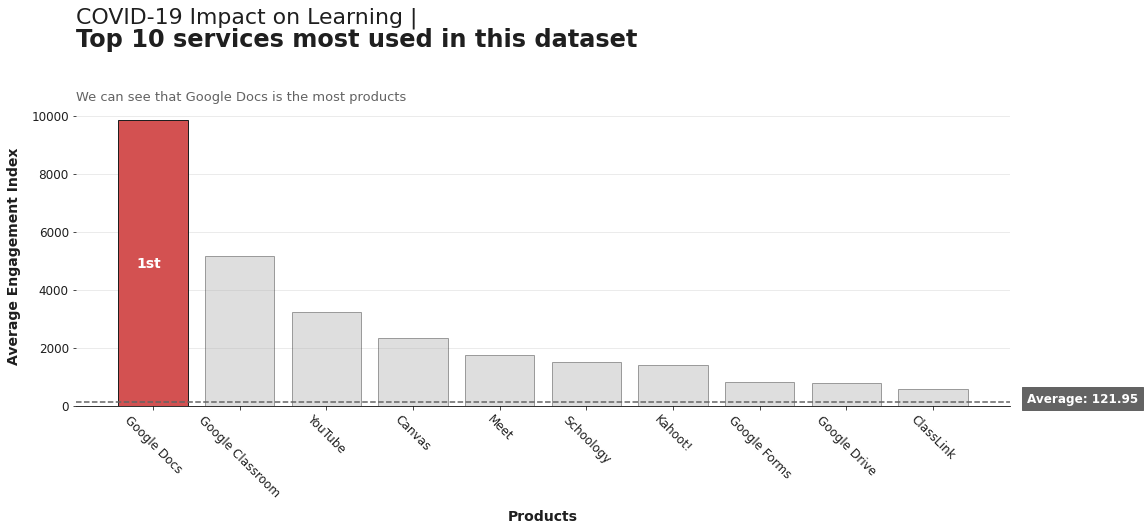

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))

data_top_10 = df[0:10]
mean_score = df.engagement_index.mean()

bars1 = ax.bar(data_top_10['Product Name'], data_top_10['engagement_index'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Products", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Average Engagement Index", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Average: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
bars1[0].set_alpha(1)
bars1[0].set_color(colors_red[3])
bars1[0].set_edgecolor(colors_dark[0])

ax.text(
    s=f"{1}st",
    va='center', ha='center', 
    x=bars1[0].get_x()+0.35, y=bars1[0].get_height()/2,
    color='white',
    fontweight='bold',
    fontsize=14,
)

plt.text(s="COVID-19 Impact on Learning |", ha='left', x=xmin, y=ymax*1.28, fontsize=22, color=colors_dark[0])
plt.text(s="Top 10 services most used in this dataset", ha='left', x=xmin, y=ymax*1.2, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("We can see that Google Docs is the most products", loc='left', fontsize=13, color=colors_dark[2]) 
        
plt.xticks(rotation=-45)
plt.tight_layout()
plt.show()

## The Rises of Google Classroom Popularity

By looking at the visualization below, we can confirmed that yes, Google Classroom have a significant increase in terms of product usages based on engagement_index. We can see that in January 2020 the average Google Classroom engagement index is below 2500. Compared to the situations after the pandemic the usage of Google Classroom sky rocketted. 

But there are one thing that is curious to see. Why the number drops on June to October. This happens because it is on summer holiday period.

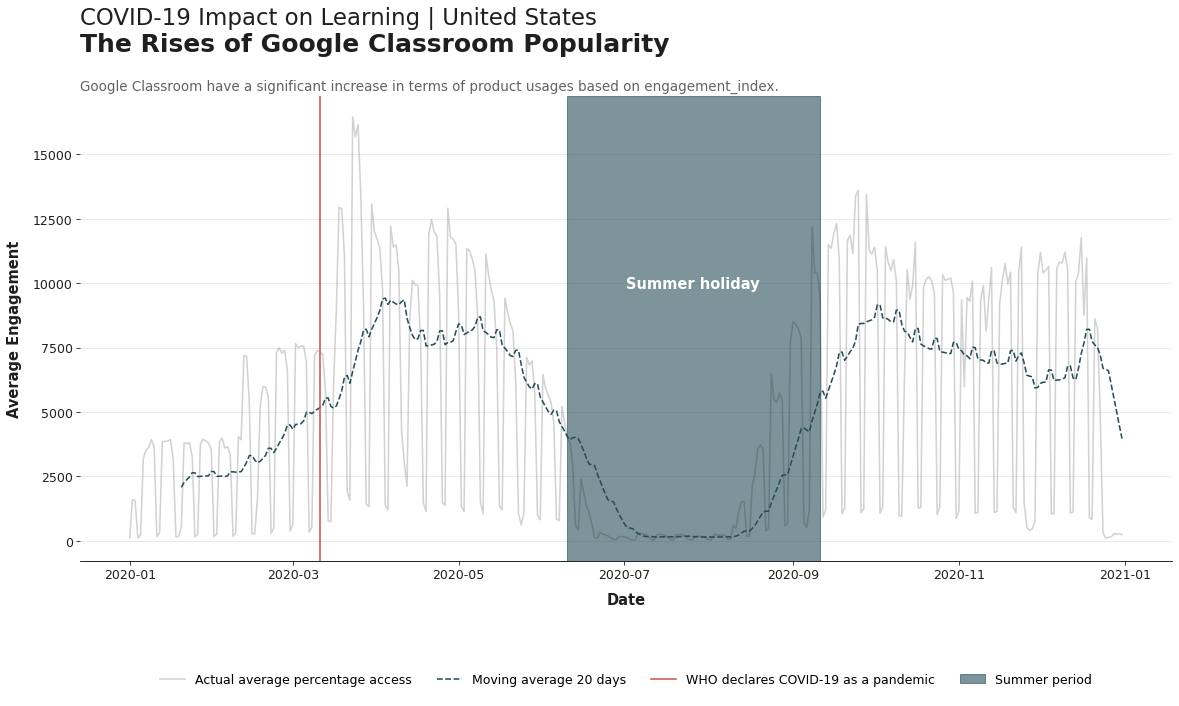

In [17]:
df = df_joined[df_joined['Product Name'] == 'Google Classroom'].groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]
rolling_20 = df[['engagement_index', 'pct_access']].rolling(window=20).mean()

fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

line0 = ax.plot(df['time'], df['engagement_index'], color=colors_dark[0], alpha=0.2, label="Actual average percentage access")
line1 = ax.plot(df['time'], rolling_20['engagement_index'], color=colors_blue[1], alpha=1, label="Moving average 20 days", linestyle='--')
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
ax.axvspan(pd.Timestamp('2020-06-10'), pd.Timestamp('2020-09-11'), alpha=0.6, color=colors_blue[1], label="Summer period")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Average Engagement", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.text(s="COVID-19 Impact on Learning | United States", ha='left', x=xmin, y=ymax*1.16, fontsize=22, color=colors_dark[0])
plt.text(s="The Rises of Google Classroom Popularity", ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Google Classroom have a significant increase in terms of product usages based on engagement_index.", loc='left', fontsize=13, color=colors_dark[2]) 


ax.text(
    s=f"Summer holiday",
    va='center', ha='center', 
    x=pd.Timestamp('2020-07-26'), y=10000,
    color='white',
    fontsize=14,
    fontweight='bold'
)


plt.tight_layout()
plt.show()

In [18]:
av_before = df[df['time'] < '2020-03-11'].mean()['engagement_index']
av_after = df[(df['time'] >= '2020-03-11') & ((df['time'] < '2020-06-10') | (df['time'] > '2020-09-11'))].mean()['engagement_index']
inc = (av_after - av_before) / (av_after) * 100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


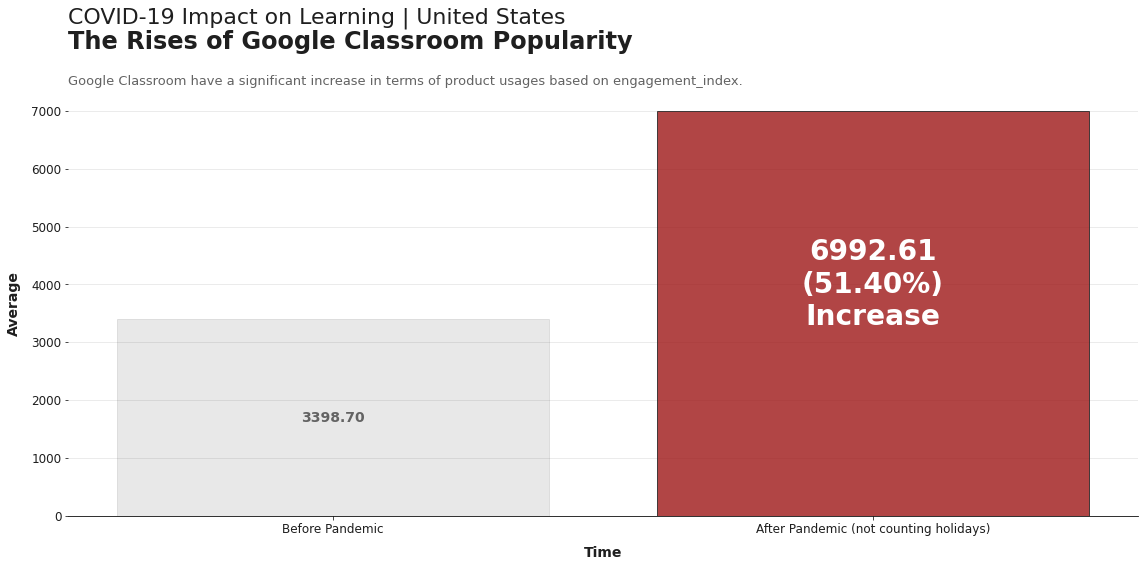

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))

data_top_10 = df[0:10]
mean_score = df.engagement_index.mean()

bars1 = ax.bar('Before Pandemic', av_before, color=colors_dark[0], alpha=0.1, edgecolor=colors_dark[0])
bars2 = ax.bar('After Pandemic (not counting holidays)', av_after, color=colors_red[2], alpha=0.8, edgecolor=colors_dark[0])

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Time", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Average", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    s="{:.2f}".format(av_before),
    va='center', ha='center', 
    x=bars1[0].get_x()+0.4, y=bars1[0].get_height()/2,
    color=colors_dark[2],
    fontweight='bold',
    fontsize=14,
)

ax.text(
    s="{:.2f}\n({:.2f}%)\nIncrease".format(av_after, inc),
    va='center', ha='center', 
    x=bars2[0].get_x()+0.4, y=4000,
    color='white',
    fontweight='bold',
    fontsize=28,
)

plt.text(s="COVID-19 Impact on Learning | United States", ha='left', x=xmin, y=ymax*1.16, fontsize=22, color=colors_dark[0])
plt.text(s="The Rises of Google Classroom Popularity", ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Google Classroom have a significant increase in terms of product usages based on engagement_index.", loc='left', fontsize=13, color=colors_dark[2]) 

plt.tight_layout()
plt.show()

## Which Category Have The Most Engagement Index?

Now, out of the top 100 products ranked based on its average engagement_index, we can see that the most popular category are Digital Learning Platform. Contributing almost 36% out of those 100 products. But is there a COVID-19 factor in this number? thats the question that we will answer next.


In [20]:
df = df_joined[df_joined['Product Name'].isin(top_100_product)].groupby('Primary Essential Function').count()[['lp_id']].sort_values('lp_id', ascending=False).reset_index()
df_pie_7 = df[0:7]
df_pie_other = df[7:]


In [21]:
new_dict = {
    "Primary Essential Function": "Other",
    "lp_id": df_pie_other['lp_id'].sum()
}
df_pie_7 = df_pie_7.append(new_dict, ignore_index=True)

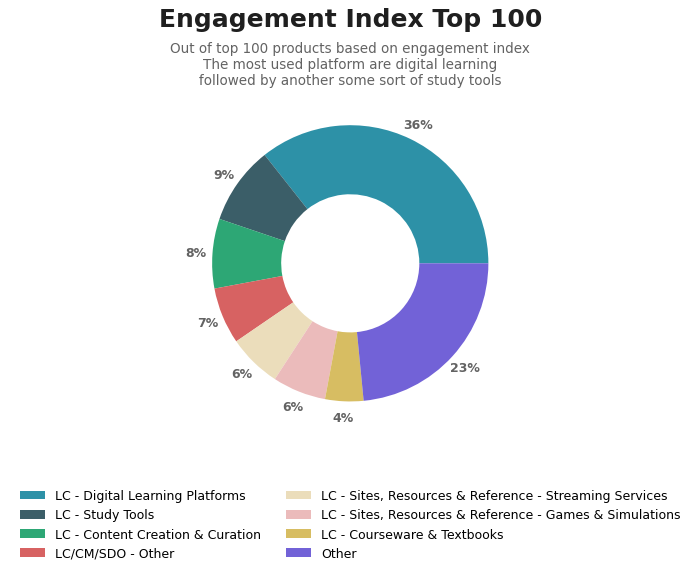

In [22]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

pie = ax.pie(
    df_pie_7['lp_id'], 
    colors=colors_mix[0:8],
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'color': colors_dark[2],
        'fontweight': 'bold'
    }, 
)

ax.legend(df_pie_7['Primary Essential Function'], loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.suptitle(t="Engagement Index Top 100", fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Out of top 100 products based on engagement index\nThe most used platform are digital learning\nfollowed by another some sort of study tools", fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

## Are There Any Increase in Engagement Index before and after COVID-19 ?

Before we answer the question are there COVID-19 factor that affects the number of users using Digital Learning Platforms, we might want to check the trend of average digital services usage based on its engagement_index on all type of products. 

In the following visualization we can see that there are COVID-19 factor that affects the the trend of average digital service usages. The trend is quite similar in the previous Google Classroom visualization.

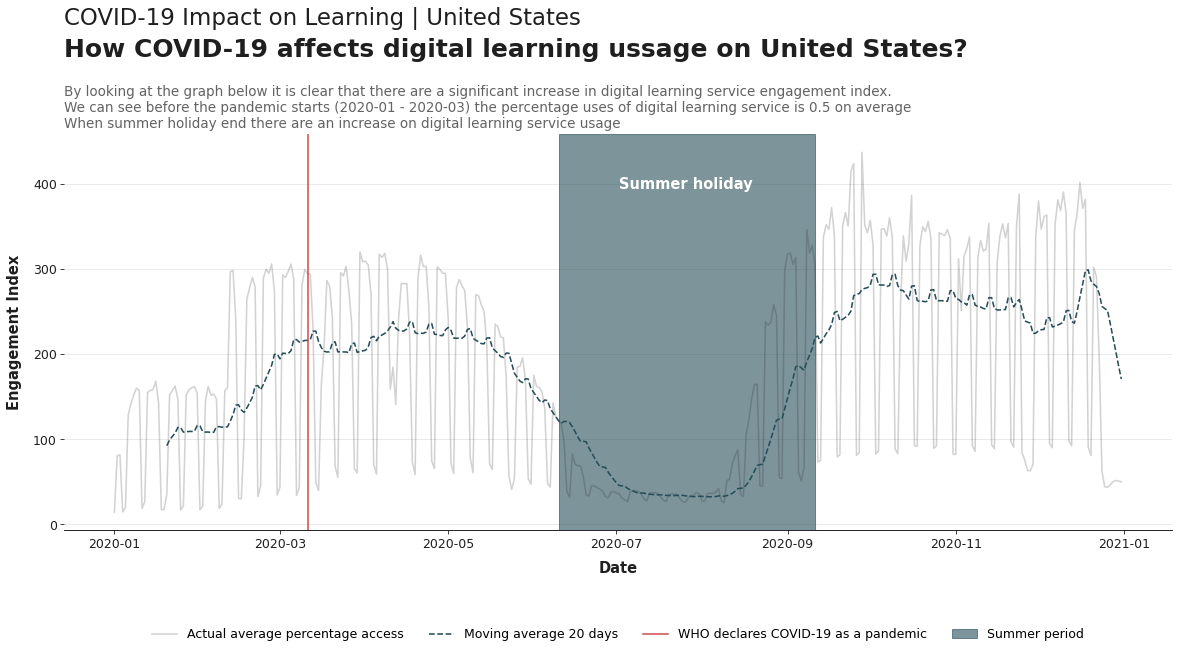

In [23]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

df_avg = df_joined.groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]
rolling_20 = df_avg[['engagement_index', 'pct_access']].rolling(window=20).mean()

line0 = ax.plot(df_avg['time'], df_avg['engagement_index'], color=colors_dark[0], alpha=0.2, label="Actual average percentage access")
line1 = ax.plot(df_avg['time'], rolling_20['engagement_index'], color=colors_blue[1], alpha=1, label="Moving average 20 days", linestyle='--')
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
ax.axvspan(pd.Timestamp('2020-06-10'), pd.Timestamp('2020-09-11'), alpha=0.6, color=colors_blue[1], label="Summer period")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Engagement Index", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.text(s="COVID-19 Impact on Learning | United States", ha='left', x=xmin, y=ymax*1.28, fontsize=22, color=colors_dark[0])
plt.text(s="How COVID-19 affects digital learning ussage on United States?", ha='left', x=xmin, y=ymax*1.2, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("By looking at the graph below it is clear that there are a significant increase in digital learning service engagement index.\nWe can see before the pandemic starts (2020-01 - 2020-03) the percentage uses of digital learning service is 0.5 on average\nWhen summer holiday end there are an increase on digital learning service usage", loc='left', fontsize=13, color=colors_dark[2]) 


ax.text(
    s=f"Summer holiday",
    va='center', ha='center', 
    x=pd.Timestamp('2020-07-26'), y=400,
    color='white',
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()

In [24]:
avg_bef_pandemic = df_joined[df_joined.time <= '2020-03-11'][['pct_access', 'engagement_index']].mean().reset_index()
avg_aft_pandemic = df_joined[df_joined.time >= '2020-09-11'][['pct_access', 'engagement_index']].mean().reset_index()

display(HTML(
    '''
    <div style="padding:10px 50px; background: white">
        <h1 style='font-weight:400; color:{};{}'>
            Before WHO declares COVID-19 pandemic the average uses and engagement index are respectivly <br/>
            <span style="color:{}; font-weight:500">{:.2f}</span> and <span style="color:{}; font-weight:500">{:.2f}</span>
            <br/> <br/> After WHO declares COVID-19 pandemic and summer holiday, the number increases, the average uses and engagement index are respectivly becomes 
            <span style="color:{}; font-weight:500">{:.2f}</span> and <span style="color:{}; font-weight:500">{:.2f}</span>

        </h1>
    </div>
    
    '''.format(
        colors_dark[0], 
        colors_dark[0], 
        colors_red[3],
        
        avg_bef_pandemic[0].iloc[0],
        colors_red[3],
        avg_bef_pandemic[0].iloc[1],
        
        colors_blue[2],
        avg_aft_pandemic[0].iloc[0],
        colors_blue[2],
        avg_aft_pandemic[0].iloc[1],
        

    )
))

## The Trend of Digital Learning Service

It's surprising to see that the increase of Digital Learning Service usage only rises around the time where WHO declares COVID-19 as a pandemic. After that the number returns to normal. This might need another in-depth analysis. 

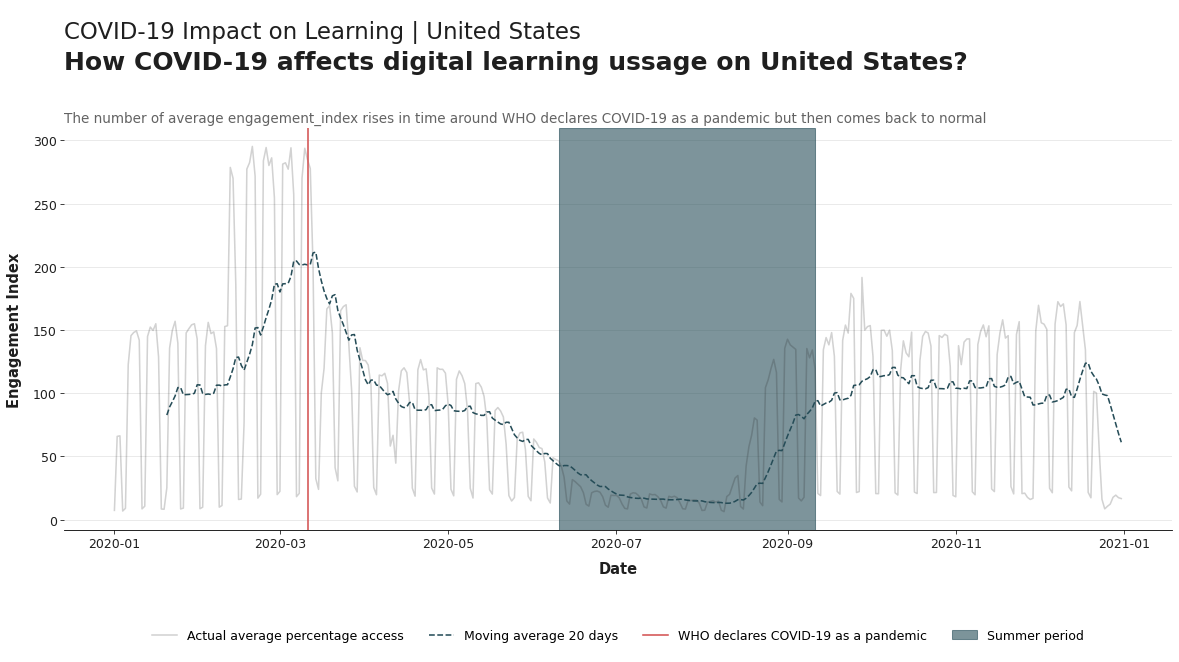

In [25]:
fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

df = df_joined[df_joined['Primary Essential Function'] == 'LC - Digital Learning Platforms'].groupby('time').mean().reset_index()[['time', 'pct_access', 'engagement_index']]
rolling_20 = df[['engagement_index', 'pct_access']].rolling(window=20).mean()

line0 = ax.plot(df['time'], df['engagement_index'], color=colors_dark[0], alpha=0.2, label="Actual average percentage access")
line1 = ax.plot(df['time'], rolling_20['engagement_index'], color=colors_blue[1], alpha=1, label="Moving average 20 days", linestyle='--')
who_line = plt.axvline(x = pd.Timestamp('2020-03-11'), color=colors_red[3], label="WHO declares COVID-19 as a pandemic")
ax.axvspan(pd.Timestamp('2020-06-10'), pd.Timestamp('2020-09-11'), alpha=0.6, color=colors_blue[1], label="Summer period")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Engagement Index", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

plt.text(s="COVID-19 Impact on Learning | United States", ha='left', x=xmin, y=ymax*1.23, fontsize=22, color=colors_dark[0])
plt.text(s="How COVID-19 affects digital learning ussage on United States?", ha='left', x=xmin, y=ymax*1.15, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("The number of average engagement_index rises in time around WHO declares COVID-19 as a pandemic but then comes back to normal", loc='left', fontsize=13, color=colors_dark[2]) 


ax.text(
    s=f"Summer holiday",
    va='center', ha='center', 
    x=pd.Timestamp('2020-07-26'), y=400,
    color='white',
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()